In [1]:
import sklearn.datasets
import pandas as pd
import numpy as np
import umap
from sklearn.utils import Bunch
import umap.plot
from dataclasses import dataclass
import numba



/root/anaconda3/lib/python3.11/site-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


In [2]:
@numba.njit()
def dot_prod_distance(a,b):
    #return np.dot(a, b)
    return (a*b).sum()

"""
@numba.njit
def dot_product_gradient(x, y):
    pass
"""

'\n@numba.njit\ndef dot_product_gradient(x, y):\n    pass\n'

In [3]:
# Data Preprocessing
#
x = np.load("encodings_dict.npy", allow_pickle=True).item()

encodings_data = {"data": [], "labels": []}

for i, v in enumerate(x.values()):
    for v_ in v:
        encodings_data["data"].append(v_)
        encodings_data["labels"].append(list(x.keys())[i])
        
encodings_data["data"] = np.array(encodings_data["data"])
encodings_data["labels"] = np.array(encodings_data["labels"])

encodings_data = Bunch(data = encodings_data["data"], labels=encodings_data["labels"])

In [4]:
@dataclass
class UMAP_config:
    n_neighbors: int = 15
    """Default value is 15 also for UMAP"""
    min_dist: float = 0.1
    """Default value for UMAP is 0.1"""
    n_components: int = 2
    """Dimension of the target space, should always be 2"""
    metric: str = "euclidean"

In [5]:
config_list = []

for n in (10, 50, 100):
    for d in (0.1, 0.25, 0.75):
        config_list.append(UMAP_config(n_neighbors=n, min_dist=d))


/root/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1850: UserWarning: custom distance metric does not return gradient; inverse_transform will be unavailable. To enable using inverse_transform method, define a distance function that returns a tuple of (distance [float], gradient [np.array])
  warn(
/root/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1850: UserWarning: custom distance metric does not return gradient; inverse_transform will be unavailable. To enable using inverse_transform method, define a distance function that returns a tuple of (distance [float], gradient [np.array])
  warn(
/root/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1850: UserWarning: custom distance metric does not return gradient; inverse_transform will be unavailable. To enable using inverse_transform method, define a distance function that returns a tuple of (distance [float], gradient [np.array])
  warn(
/root/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1850: UserWarning: c

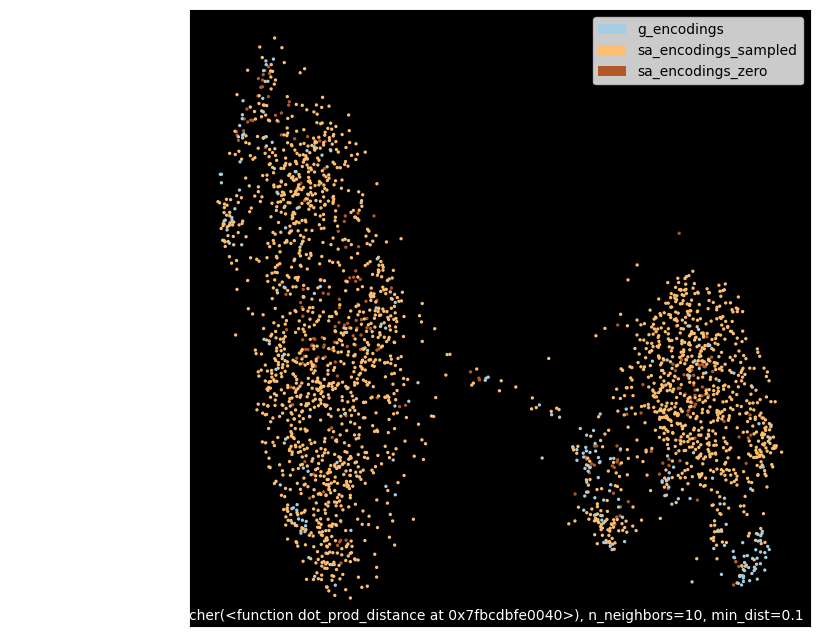

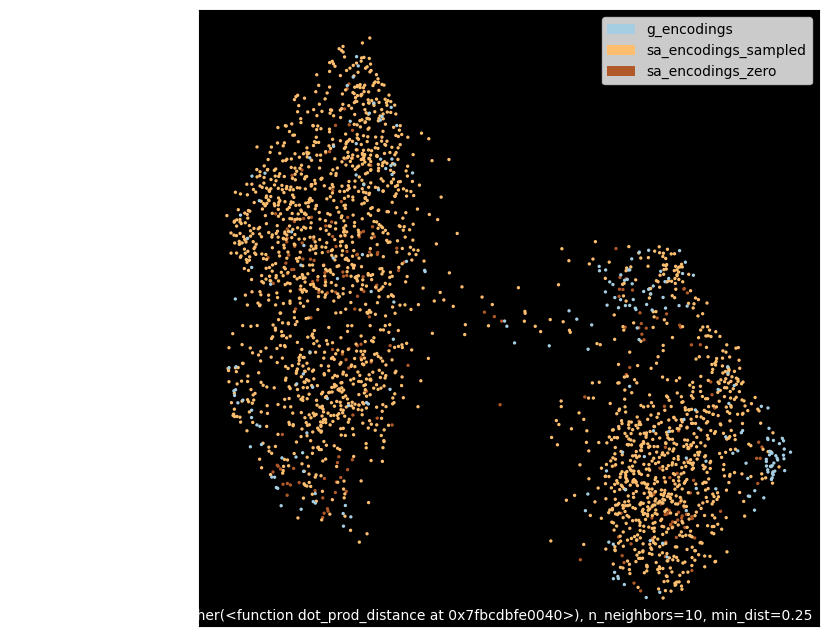

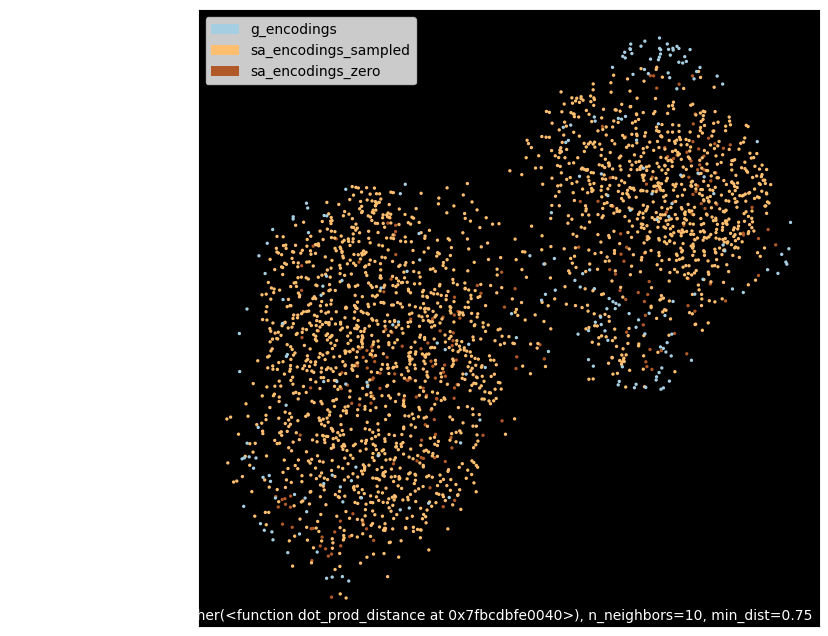

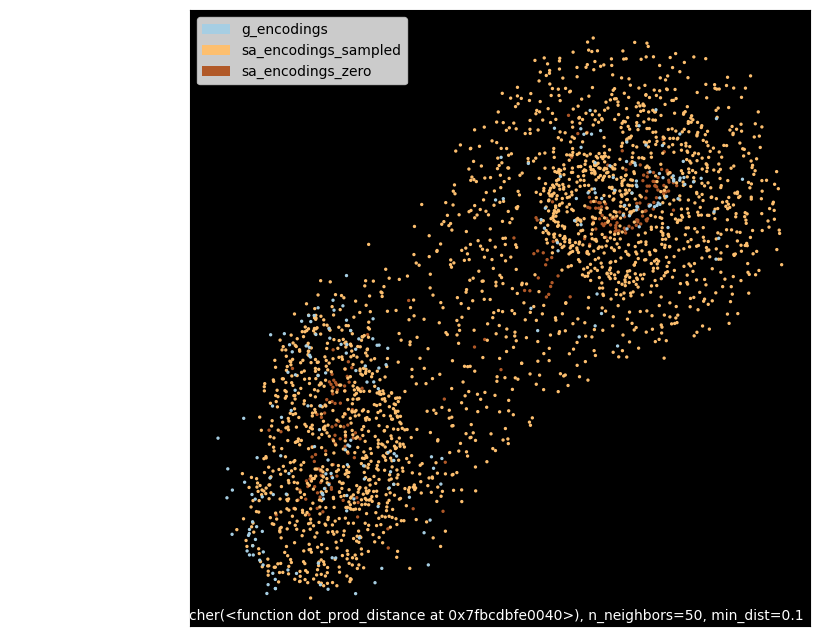

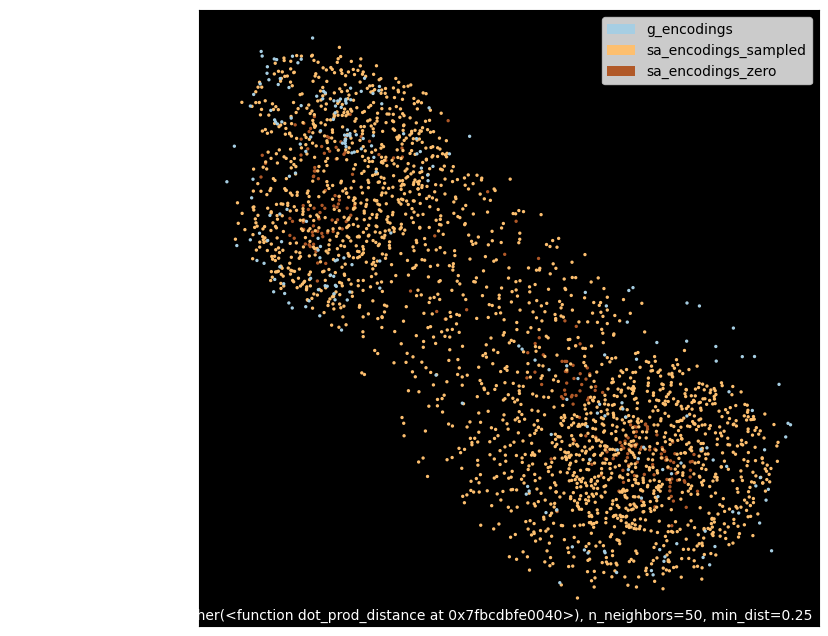

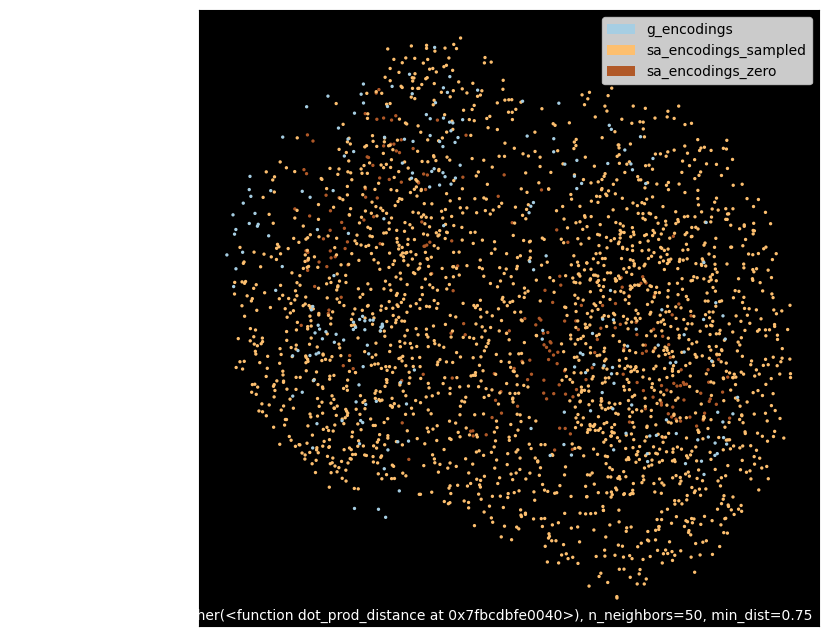

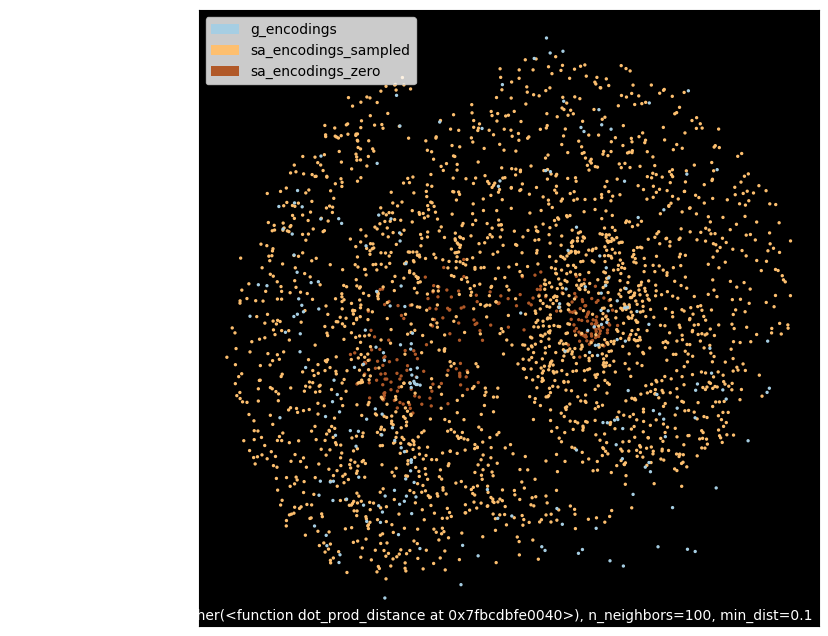

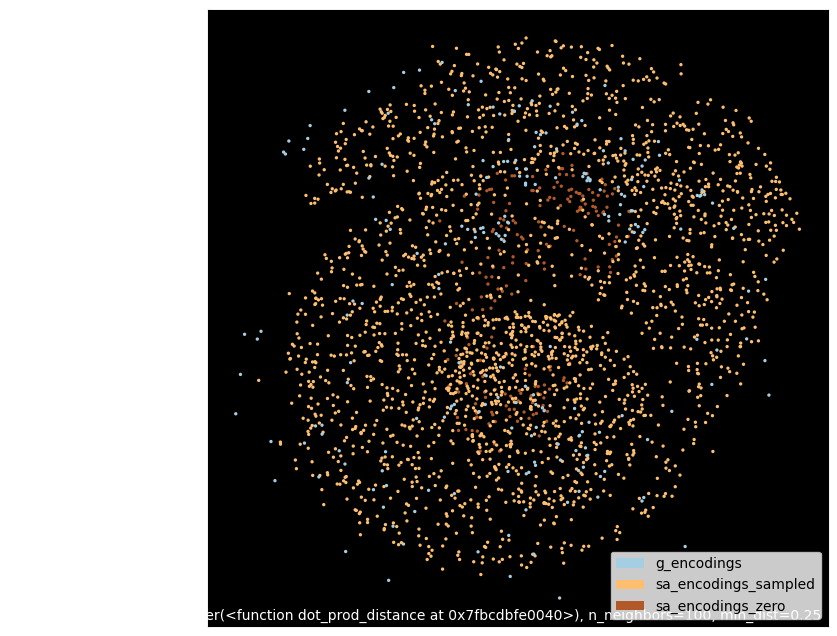

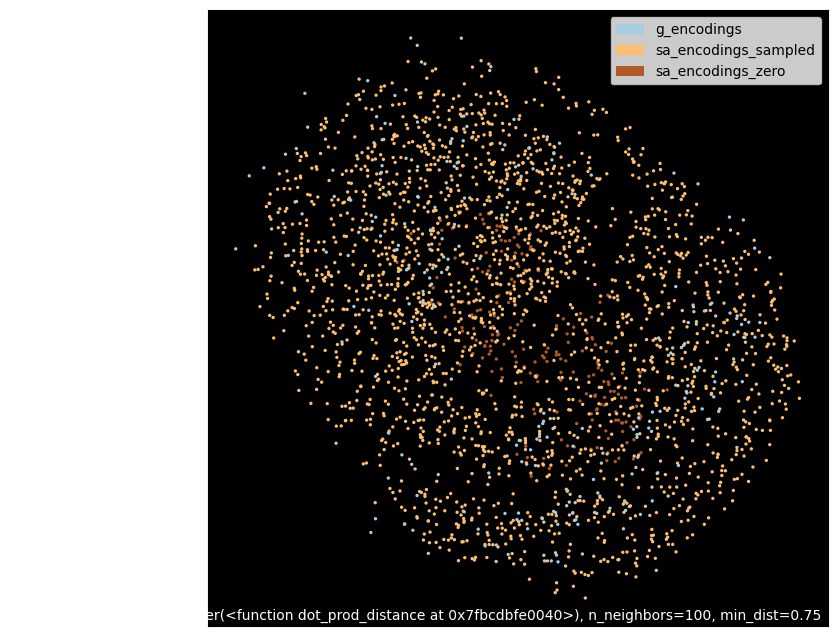

In [6]:
for conf in config_list:
    try:
        mapper = umap.UMAP(
            n_neighbors = conf.n_neighbors,
            min_dist = conf.min_dist,
            metric = dot_prod_distance
            #metric = (dot_prod_distance, dot_product_gradient)
        ).fit(encodings_data.data)
        umap.plot.points(mapper, labels=encodings_data.labels, color_key_cmap='Paired', background='black')
    except:
        pass